Struktur Decision Tree:
Nyeri_Dada <= 0
--> True:
  Prediksi: Tidak Ada
--> False:
  Sistolik <= 140
  --> True:
    Prediksi: ACS
  --> False:
    Sistolik <= 150
    --> True:
      Prediksi: Gagal Jantung
    --> False:
      Prediksi: PJB Sianotik


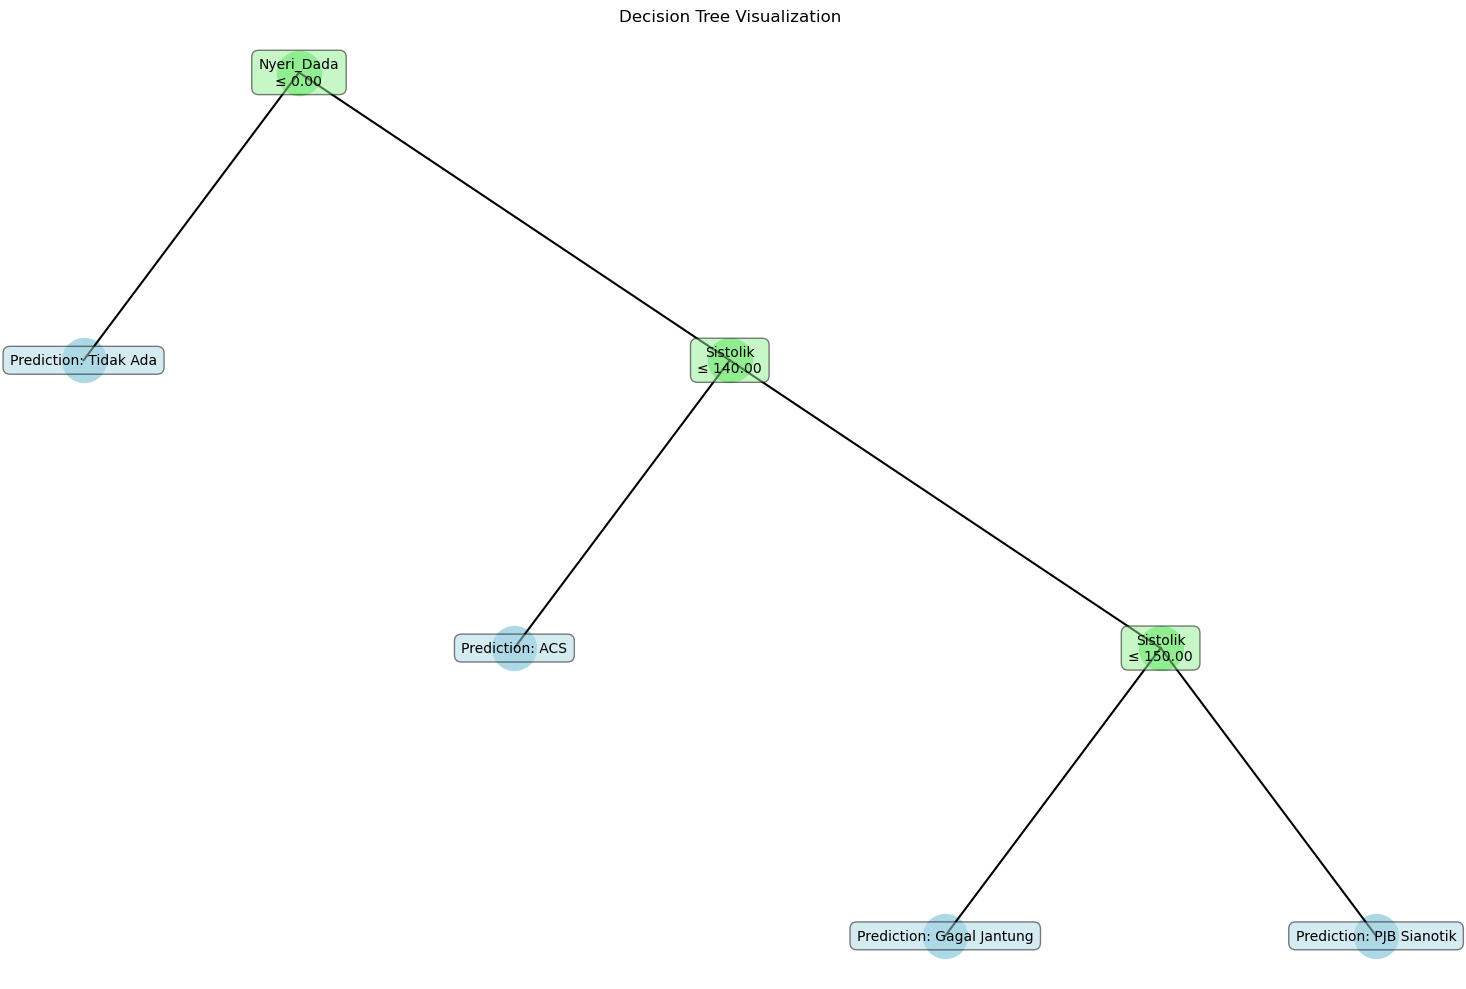


Prediksi untuk sampel pertama: ACS (Aktual: ACS)
Akurasi Model: 90.00%
Hasil prediksi lengkap disimpan di 'hasil_prediksi_manual.xlsx'


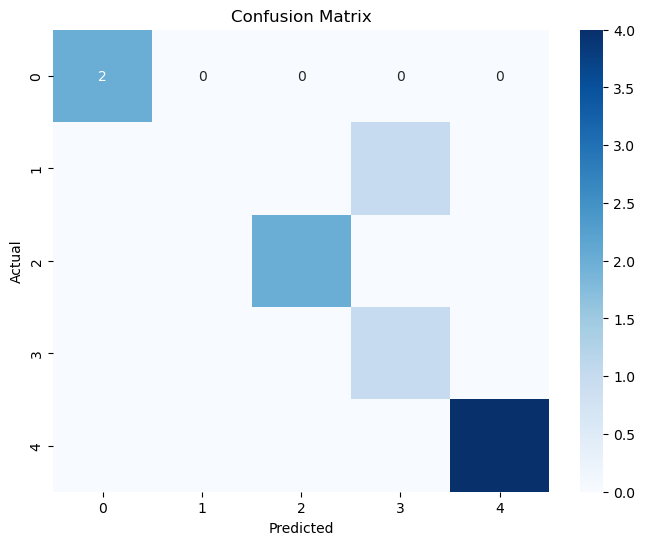


Evaluation Metrics:
                precision    recall  f1-score   support

           ACS       1.00      1.00      1.00         2
Demam Reumatik       0.00      0.00      0.00         1
 Gagal Jantung       1.00      1.00      1.00         2
  PJB Sianotik       0.50      1.00      0.67         1
     Tidak Ada       1.00      1.00      1.00         4

      accuracy                           0.90        10
     macro avg       0.70      0.80      0.73        10
  weighted avg       0.85      0.90      0.87        10


Frequency Table:
Predicted       ACS  Gagal Jantung  PJB Sianotik  Tidak Ada
Actual                                                     
ACS               2              0             0          0
Demam Reumatik    0              0             1          0
Gagal Jantung     0              2             0          0
PJB Sianotik      0              0             1          0
Tidak Ada         0              0             0          4


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


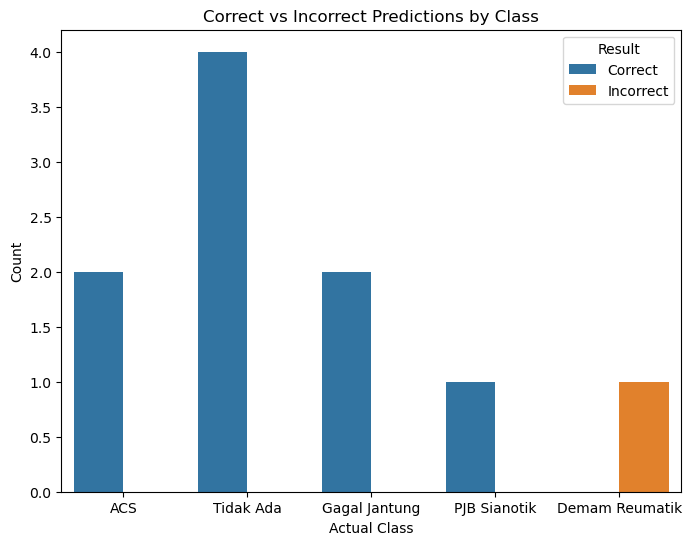


Accuracy per class:
Actual
ACS               1.0
Demam Reumatik    NaN
Gagal Jantung     1.0
PJB Sianotik      1.0
Tidak Ada         1.0
dtype: float64
Model disimpan di 'model_tree.json'


In [10]:
# %% [markdown]
# # Implementasi Manual Algoritma C5.0 (Decision Tree)
# **Langkah 1: Import Library Dasar**
# %%
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json

# %% [markdown]
# **Langkah 2: Definisi Fungsi Entropi dan Information Gain Ratio**
# %%
def entropy(target):
    counts = Counter(target)
    probabilities = [count / len(target) for count in counts.values()]
    return -sum(p * math.log2(p) for p in probabilities if p > 0)

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = 0
    
    for value in values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset[target])
        weighted_entropy += (len(subset) / len(data)) * subset_entropy
    
    return total_entropy - weighted_entropy

def split_info(data, feature):
    values = data[feature].unique()
    split_entropy = 0
    
    for value in values:
        subset = data[data[feature] == value]
        probability = len(subset) / len(data)
        split_entropy -= probability * math.log2(probability) if probability > 0 else 0
    
    return split_entropy

def gain_ratio(data, feature, target):
    ig = information_gain(data, feature, target)
    si = split_info(data, feature)
    return ig / si if si != 0 else 0

# %% [markdown]
# **Langkah 3: Baca dan Preprocess Data**
# %%
data = {
    'Usia': [45, 50, 60, 35, 55, 40, 65, 48, 52, 58],
    'Jenis_Kelamin': ['L', 'P', 'L', 'P', 'L', 'P', 'L', 'P', 'L', 'P'],
    'Tekanan_Darah': ['140/90', '130/85', '150/95', '120/80', '160/100', '110/70', '170/110', '140/90', '130/85', '150/95'],
    'Kolesterol': [220, 180, 240, 160, 260, 170, 280, 200, 190, 230],
    'Gula_Darah': [120, 110, 140, 90, 150, 100, 160, 120, 110, 130],
    'Nyeri_Dada': ['Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya'],
    'Sesak_Napas': ['Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Tidak', 'Ya'],
    'Kelelahan': ['Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya'],
    'Denyut_Jantung': [80, 75, 90, 70, 85, 72, 95, 78, 74, 88],
    'Penyakit_Jantung': ['ACS', 'Tidak Ada', 'Gagal Jantung', 'Tidak Ada', 'PJB Sianotik', 'Tidak Ada', 'Demam Reumatik', 'ACS', 'Tidak Ada', 'Gagal Jantung']
}

df = pd.DataFrame(data)

# Pisahkan tekanan darah
df[['Sistolik', 'Diastolik']] = df['Tekanan_Darah'].str.split('/', expand=True).astype(int)
df = df.drop('Tekanan_Darah', axis=1)

# Konversi fitur kategorikal ke numerik (untuk simplicity)
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map({'L': 0, 'P': 1})
df['Nyeri_Dada'] = df['Nyeri_Dada'].map({'Tidak': 0, 'Ya': 1})
df['Sesak_Napas'] = df['Sesak_Napas'].map({'Tidak': 0, 'Ya': 1})
df['Kelelahan'] = df['Kelelahan'].map({'Tidak': 0, 'Ya': 1})

# %% [markdown]
# **Langkah 4: Bangun Decision Tree Secara Manual**
# %%
class DecisionNode:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        self.feature = feature    # Fitur untuk split (misal: 'Usia')
        self.threshold = threshold  # Threshold untuk split (misal: 50)
        self.value = value        # Nilai kelas jika leaf node (misal: 'ACS')
        self.left = left          # Subtree untuk nilai <= threshold
        self.right = right        # Subtree untuk nilai > threshold

def build_tree(data, target, features, depth=0, max_depth=3):
    # Stopping condition: jika semua target sama atau mencapai max_depth
    if len(data[target].unique()) == 1 or depth == max_depth:
        return DecisionNode(value=Counter(data[target]).most_common(1)[0][0])
    
    # Hitung gain ratio untuk semua fitur
    best_gain = -1
    best_feature = None
    best_threshold = None
    
    for feature in features:
        if data[feature].dtype == 'object':
            continue  # Skip jika fitur kategorikal (sudah diencode)
        
        # Cari threshold optimal untuk fitur numerik
        unique_values = sorted(data[feature].unique())
        for threshold in unique_values:
            gain = gain_ratio(data, feature, target)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold
    
    # Jika tidak ada split yang mungkin
    if best_gain == 0:
        return DecisionNode(value=Counter(data[target]).most_common(1)[0][0])
    
    # Split data
    left_data = data[data[best_feature] <= best_threshold]
    right_data = data[data[best_feature] > best_threshold]
    
    # Rekursif untuk subtree
    left = build_tree(left_data, target, features, depth + 1, max_depth)
    right = build_tree(right_data, target, features, depth + 1, max_depth)
    
    return DecisionNode(feature=best_feature, threshold=best_threshold, left=left, right=right)

# Bangun pohon dengan maksimal kedalaman 3
target = 'Penyakit_Jantung'
features = df.columns.drop(target)
tree = build_tree(df, target, features, max_depth=3)

# %% [markdown]
# **Langkah 5: Visualisasi Pohon Keputusan**
# %%
def plot_tree(node, spacing=""):
    if node.value is not None:
        print(spacing + "Prediksi:", node.value)
        return
    
    print(spacing + f"{node.feature} <= {node.threshold}")
    
    if node.left:
        print(spacing + '--> True:')
        plot_tree(node.left, spacing + "  ")
    
    if node.right:
        print(spacing + '--> False:')
        plot_tree(node.right, spacing + "  ")

print("Struktur Decision Tree:")
plot_tree(tree)

def calculate_tree_layout(node, level=0, pos=0, width=2.0):
    """Calculate positions for each node in the tree"""
    if node is None:
        return {}, {}, 0
    
    # Initialize dictionaries for positions
    pos_dict = {}
    level_dict = {}
    
    if node.value is not None:
        # Leaf node
        pos_dict[id(node)] = (pos, -level)
        level_dict[id(node)] = level
        width = 1.0
        return pos_dict, level_dict, width
    
    # Calculate positions for left and right subtrees
    left_pos, left_levels, left_width = calculate_tree_layout(node.left, level+1, pos, width/2)
    right_pos, right_levels, right_width = calculate_tree_layout(node.right, level+1, pos + left_width, width/2)
    
    # Current node position
    pos_dict.update(left_pos)
    pos_dict.update(right_pos)
    pos_dict[id(node)] = (pos + left_width/2, -level)
    
    level_dict.update(left_levels)
    level_dict.update(right_levels)
    level_dict[id(node)] = level
    
    return pos_dict, level_dict, left_width + right_width

def visualize_tree(tree):
    fig, ax = plt.subplots(figsize=(15, 10))
    pos_dict, level_dict, _ = calculate_tree_layout(tree)
    
    # Draw edges
    for node_id, (x, y) in pos_dict.items():
        node = next(n for n in [tree] + get_all_nodes(tree) if id(n) == node_id)
        if node.left:
            child_x, child_y = pos_dict[id(node.left)]
            ax.plot([x, child_x], [y, child_y], 'k-')
        if node.right:
            child_x, child_y = pos_dict[id(node.right)]
            ax.plot([x, child_x], [y, child_y], 'k-')
    
    # Draw nodes
    for node_id, (x, y) in pos_dict.items():
        node = next(n for n in [tree] + get_all_nodes(tree) if id(n) == node_id)
        if node.value is not None:
            # Leaf node
            label = f'Prediction: {node.value}'
            color = 'lightblue'
        else:
            # Decision node
            label = f'{node.feature}\n≤ {node.threshold:.2f}'
            color = 'lightgreen'
        
        ax.scatter(x, y, c=color, s=1000)
        ax.annotate(label, (x, y), xytext=(0, 0), textcoords='offset points',
                   ha='center', va='center', bbox=dict(boxstyle='round,pad=0.5',
                   fc=color, alpha=0.5))
    
    ax.set_title('Decision Tree Visualization')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

def get_all_nodes(node):
    """Helper function to get all nodes in the tree"""
    nodes = []
    if node.left:
        nodes.append(node.left)
        nodes.extend(get_all_nodes(node.left))
    if node.right:
        nodes.append(node.right)
        nodes.extend(get_all_nodes(node.right))
    return nodes

# Visualize the tree
visualize_tree(tree)

# %% [markdown]
# **Langkah 6: Prediksi dan Evaluasi**
# %%
def predict(tree, sample):
    if tree.value is not None:
        return tree.value
    
    if sample[tree.feature] <= tree.threshold:
        return predict(tree.left, sample)
    else:
        return predict(tree.right, sample)

# Contoh prediksi
sample = df.iloc[0]  # Data pertama
prediction = predict(tree, sample)
print(f"\nPrediksi untuk sampel pertama: {prediction} (Aktual: {sample[target]})")

# Evaluasi seluruh data
correct = 0
for idx, row in df.iterrows():
    pred = predict(tree, row)
    if pred == row[target]:
        correct += 1

accuracy = correct / len(df)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# %% [markdown]
# **Langkah 7: Simpan Hasil ke Excel dengan Data Lengkap**
results = []
for idx, row in df.iterrows():
    pred = predict(tree, row)
    
    # Create dictionary with all original data plus prediction
    result_dict = {
        'Usia': row['Usia'],
        'Jenis_Kelamin': 'L' if row['Jenis_Kelamin'] == 0 else 'P',
        'Sistolik': row['Sistolik'],
        'Diastolik': row['Diastolik'],
        'Kolesterol': row['Kolesterol'],
        'Gula_Darah': row['Gula_Darah'],
        'Nyeri_Dada': 'Ya' if row['Nyeri_Dada'] == 1 else 'Tidak',
        'Sesak_Napas': 'Ya' if row['Sesak_Napas'] == 1 else 'Tidak',
        'Kelelahan': 'Ya' if row['Kelelahan'] == 1 else 'Tidak',
        'Denyut_Jantung': row['Denyut_Jantung'],
        'Aktual': row[target],
        'Prediksi': pred
    }
    results.append(result_dict)

# Convert to DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('hasil_prediksi_manual.xlsx', index=False)
print("Hasil prediksi lengkap disimpan di 'hasil_prediksi_manual.xlsx'")

# %% [markdown]
# **Langkah 8: Simpan Model ke File (Serialisasi Sederhana)**
# %%


def convert_to_serializable(obj):
    if isinstance(obj, (np.int32, np.int64)):
        return int(obj)
    raise TypeError(f"Object of type {type(obj)} is not JSON serializable")

def save_tree(node, filename):
    tree_dict = {}
    if node.value is not None:
        tree_dict['value'] = node.value
    else:
        tree_dict['feature'] = node.feature
        tree_dict['threshold'] = node.threshold
        tree_dict['left'] = save_tree(node.left, filename) if node.left else None
        tree_dict['right'] = save_tree(node.right, filename) if node.right else None
    with open(filename, 'w') as f:
        json.dump(tree_dict, f, default=convert_to_serializable)
    return tree_dict


# Step 2: Calculate predictions and create evaluation DataFrame
y_true = df[target].values
y_pred = np.array([predict(tree, row) for _, row in df.iterrows()])

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Visualization and Metrics
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print classification report
print("\nEvaluation Metrics:")
print(classification_report(y_true, y_pred))

# Create comparison DataFrame with proper data types
comparison_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})
comparison_df['Is_Correct'] = comparison_df['Actual'] == comparison_df['Predicted']

# Frequency table
freq_table = pd.crosstab(comparison_df['Actual'], comparison_df['Predicted'])
print("\nFrequency Table:")
print(freq_table)

# Visualization of correct vs incorrect predictions
plt.figure(figsize=(8, 6))
comparison_df['Result'] = comparison_df['Is_Correct'].map({True: 'Correct', False: 'Incorrect'})
sns.countplot(data=comparison_df, x='Actual', hue='Result')
plt.title('Correct vs Incorrect Predictions by Class')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.show()

# Calculate and display accuracy per class
class_accuracy = comparison_df[comparison_df['Is_Correct']].groupby('Actual').size() / comparison_df.groupby('Actual').size()
print("\nAccuracy per class:")
print(class_accuracy)

save_tree(tree, 'model_tree.json')
print("Model disimpan di 'model_tree.json'")